<a href="https://colab.research.google.com/github/samndambuki/ML-Foundations/blob/main/NN_and_CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
from keras.datasets import mnist
from keras_preprocessing.image import load_img
from keras_preprocessing.image import array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Load the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#understanding image format
X_train[0].shape

(28, 28)

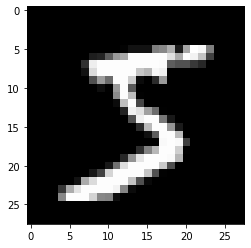

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

In [7]:
#Preprocessing image data
image_height,image_width = 28,28

In [8]:
X_train = X_train.reshape(60000,image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train /= 255.0
X_train /= 255.0
print(X_train[0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [13]:
#Building Keras model
model = Sequential()

In [16]:
model.add(Dense(512,activation='relu', input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [17]:
#Compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Training Model
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5058 - accuracy: 0.8380 - val_loss: 8392.2070 - val_accuracy: 0.8963
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2062 - accuracy: 0.9366 - val_loss: 5844.5234 - val_accuracy: 0.9338
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1446 - accuracy: 0.9559 - val_loss: 5421.6426 - val_accuracy: 0.9446
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1127 - accuracy: 0.9656 - val_loss: 8158.7783 - val_accuracy: 0.9270
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0922 - accuracy: 0.9706 - val_loss: 7799.6177 - val_accuracy: 0.9307
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0804 - accuracy: 0.9752 - val_loss: 10111.1572 - val_accuracy: 0.9256
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0696 - accuracy: 0.9781 -

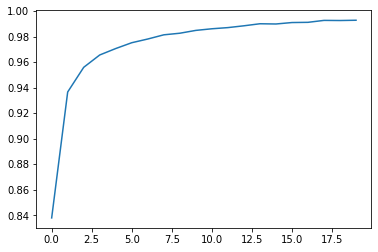

In [24]:
#accuracy 
#plotting the accuracy
plt.plot(history.history['accuracy'])

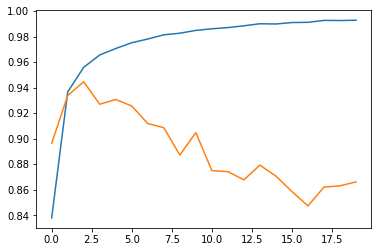

In [27]:
#accuracy trraining and validation with loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

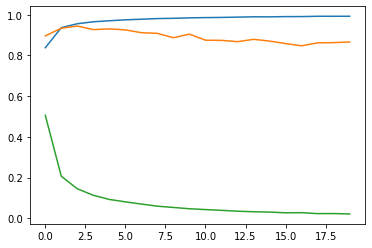

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [29]:
#Evaluate model
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 45731.0547 - accuracy: 0.8662


In [30]:
score

[45731.0546875, 0.8661999702453613]